In [19]:
from pathlib import Path
from PIL import Image


In [20]:
# dir with all input data from Kaggle
INP_DIR = Path('/home/vignesh/workspace/lyft_3d/data/proper/3d-object-detection-for-autonomous-vehicles/')

In [21]:
# dir with index json tables (scenes, categories, logs, etc...)
TABLES_DIR = INP_DIR.joinpath('train_data')

In [27]:
# Adjust the dataroot parameter below to point to your local dataset path.
# The correct dataset path contains at least the following four folders (or similar): images, lidar, maps
!ln -s {INP_DIR}/train_images {INP_DIR}/images
!ln -s {INP_DIR}/train_maps {INP_DIR}/maps
!ln -s {INP_DIR}/train_lidar {INP_DIR}/lidar

In [35]:
DATA_DIR = Path('/home/vignesh/workspace/lyft_3d/data/proper/3d-object-detection-for-autonomous-vehicles').absolute() 
# Empty init equals '.'.
# We use this because we link train dirs to current dir (cell above)


In [36]:
# dir to write KITTY-style dataset
count = 150000
STORE_DIR = Path(f'/home/vignesh/workspace/lyft_3d/data/proper/kitti_format_{count}').absolute() 

In [25]:
!python -m lyft_dataset_sdk.utils.export_kitti nuscenes_gt_to_kitti -h

INFO: Showing help with the command 'export_kitti.py nuscenes_gt_to_kitti -- --help'.

NAME
    export_kitti.py nuscenes_gt_to_kitti - Converts nuScenes GT fromatted annotations to KITTI format.

SYNOPSIS
    export_kitti.py nuscenes_gt_to_kitti LYFT_DATAROOT TABLE_FOLDER <flags>

DESCRIPTION
    Converts nuScenes GT fromatted annotations to KITTI format.

POSITIONAL ARGUMENTS
    LYFT_DATAROOT
        Where lyft dataset stored (root dir).
    TABLE_FOLDER
        folder with tables (json files).

FLAGS
    --lidar_name=LIDAR_NAME
        Name of the lidar sensor. Only one lidar allowed at this moment.
    --get_all_detections=GET_ALL_DETECTIONS
        If True, will write all bboxes in PointCloud and use only FrontCamera.
    --parallel_n_jobs=PARALLEL_N_JOBS
        Number of threads to parralel processing.
    --samples_count=SAMPLES_COUNT
        Number of samples to convert.

NOTES
    You can also use flags syntax for POSITIONAL ARGUMENTS


In [ ]:
!python -m lyft_dataset_sdk.utils.export_kitti nuscenes_gt_to_kitti \
        --lyft_dataroot {DATA_DIR} \
        --table_folder {TABLES_DIR} \
        --samples_count 150000 \
        --parallel_n_jobs 2 \
        --get_all_detections True \
        --store_dir {STORE_DIR}

9 category,
18 attribute,
4 visibility,
18421 instance,
10 sensor,
148 calibrated_sensor,
177789 ego_pose,
180 log,
180 scene,
22680 sample,
189504 sample_data,
638179 sample_annotation,
1 map,
Done loading in 19.1 seconds.
Reverse indexing ...
Done reverse indexing in 7.6 seconds.
  1%|▍                                    | 304/22680 [02:49<3:18:52,  1.88it/s]

In [29]:
# check created (converted) files. velodyne = LiDAR poinclouds data (in binary)
!ls {STORE_DIR}/velodyne | head -2

095d5bb88eb9cdd223b90d2a1475c0cf2f4b4c2a8aca82ba0ae51f6fba540440.bin
098ed5e4f46ffb242312eee1c9cfd47390bd1c91f5eb0189380ef429c00b40eb.bin


In [30]:
# render converted data for check. Currently don't support multithreading :(
!python -m lyft_dataset_sdk.utils.export_kitti render_kitti \
        --store_dir {STORE_DIR}

Rendering 3d boxes projected from 3d KITTI format
100%|███████████████████████████████████████████| 20/20 [04:09<00:00, 12.47s/it]


In [31]:
# Script above write images to 'render' folder
# in store_dir (where we have converted dataset)
RENDER_DIR = STORE_DIR.joinpath('render')

In [32]:
# get all rendered files
all_renders = list(RENDER_DIR.glob('*'))
all_renders.sort()

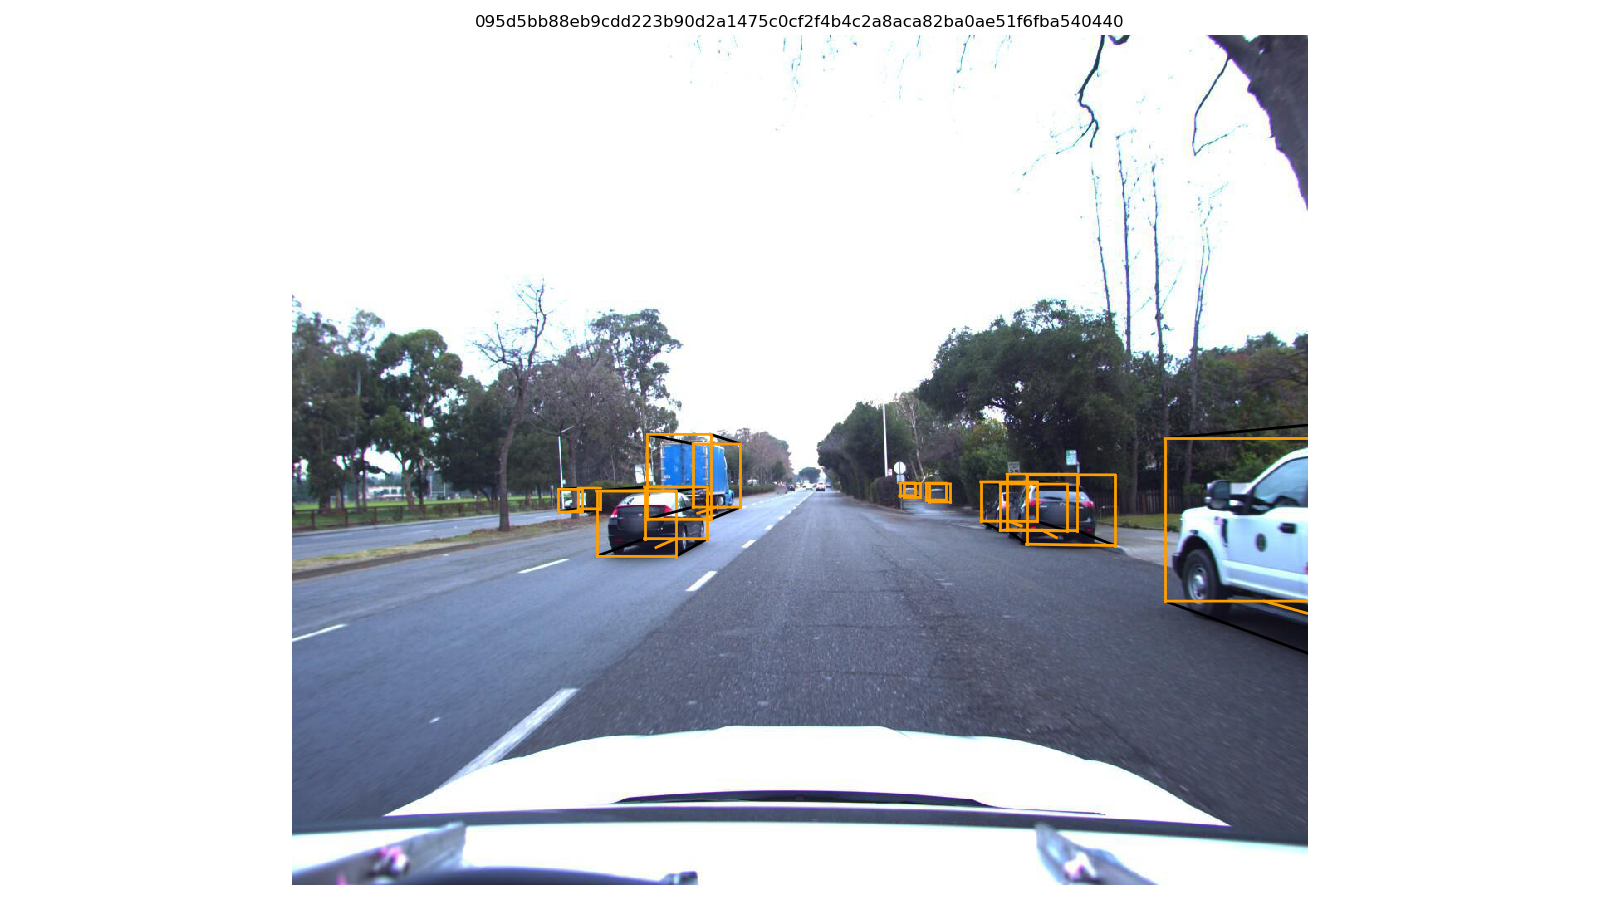

In [33]:
Image.open(all_renders[0])

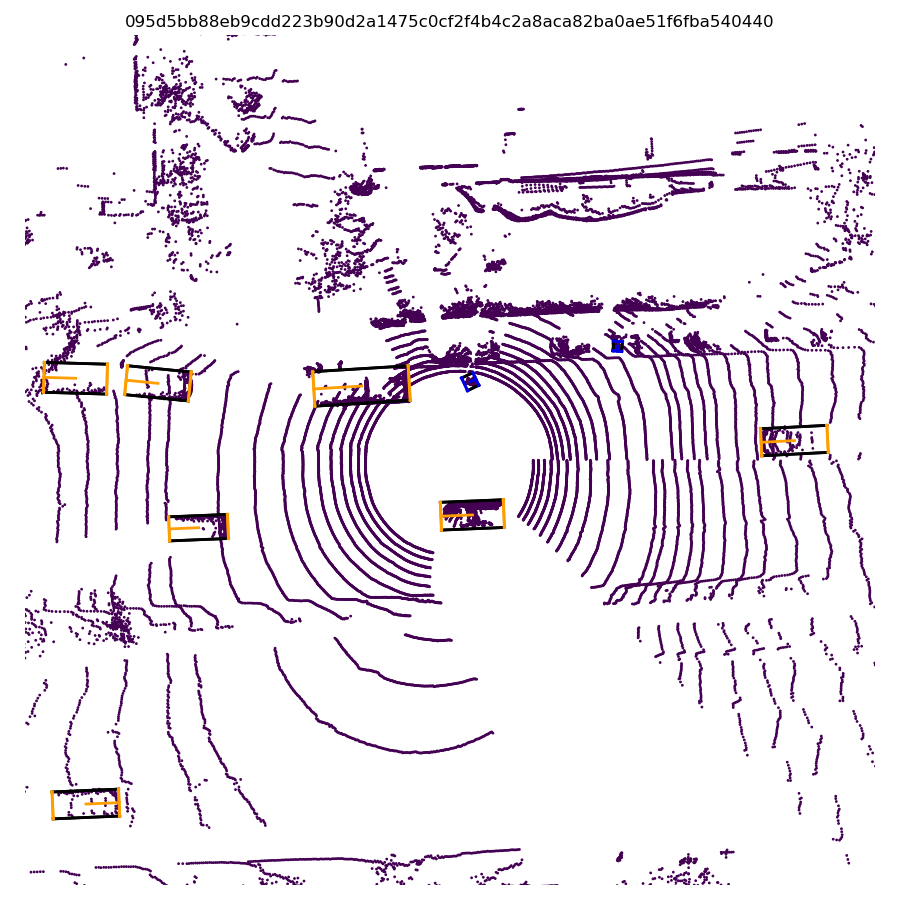

In [34]:
Image.open(all_renders[1])